In [1]:
import torch
from torch import nn

import matplotlib.pyplot as plt

torch.__version__

'2.4.0+cu121'

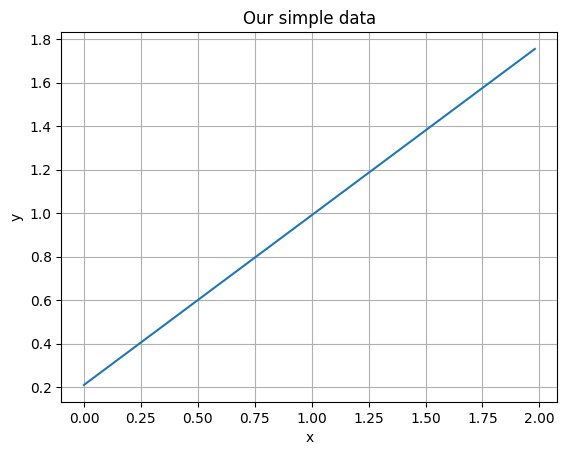

In [2]:
weight = 0.78
bias = 0.21

x = torch.arange(0, 2, 0.02)
y = weight * x + bias

plt.title("Our simple data")
plt.grid()
plt.ylabel("y")
plt.xlabel("x")
plt.plot(x, y);

In [3]:
split = 0.8
split_idx = int(split * x.shape[0])

x_train = x[:split_idx]
x_test = x[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

torch.Size([80]) torch.Size([20]) torch.Size([80]) torch.Size([20])


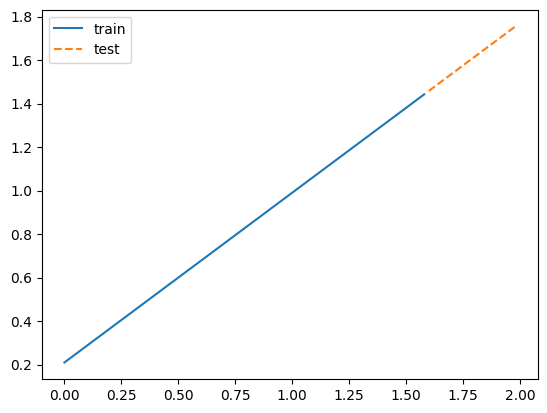

In [4]:
plt.plot(x_train, y_train, label="train")
plt.plot(x_test, y_test, "--", label="test")
plt.legend();

## Model time

In [5]:
# From scratch
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float),
                                    requires_grad=True)  # 1 number
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                                     requires_grad=True)
        
    def forward(self, x) -> torch.Tensor:
        return self.weight * x + self.bias

### Important torch modules for neural network building:
- torch.nn
- torch.optim
- torch.utils.data.Dataset
- torch.utils.data.DataLoader

What code above uses:
- Parameter - stores tensors, so they are compatible with nn.Module
- nn.Module - base class for any model (requires forward)

In [6]:
modelka = LinearRegressionModel()
print(list(modelka.parameters()))  # Oh, cool!
print("="*60)
print("OR")
modelka.state_dict()  # I stick with this one

[Parameter containing:
tensor([0.4269], requires_grad=True), Parameter containing:
tensor([-0.2440], requires_grad=True)]
OR


OrderedDict([('weight', tensor([0.4269])), ('bias', tensor([-0.2440]))])

In [7]:
# Make a prediction:
with torch.inference_mode():
    y_preds = modelka(x_test)
y_preds  # nonsense, because model is not trained yet

tensor([0.4389, 0.4475, 0.4560, 0.4646, 0.4731, 0.4816, 0.4902, 0.4987, 0.5072,
        0.5158, 0.5243, 0.5329, 0.5414, 0.5499, 0.5585, 0.5670, 0.5755, 0.5841,
        0.5926, 0.6012])

## Nerd Time!
torch.inference_mode is a context manager used for predicting (forward propagation).
It disables gradient tracking and makes forward passes only.

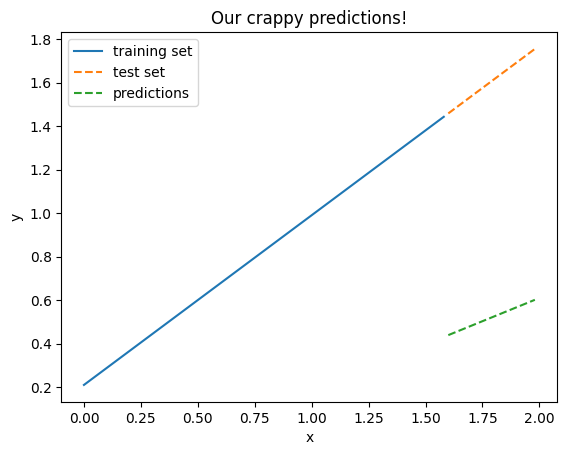

In [8]:
plt.title("Our crappy predictions!")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_train, y_train, label="training set")
plt.plot(x_test, y_test, "--", label="test set")
plt.plot(x_test, y_preds, "--", label="predictions")
plt.legend();

## Train Model
### Optimizer and loss

In [9]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=modelka.parameters(), lr=0.1)  # params stores parameters we optimize

In [10]:
list(modelka.parameters())

[Parameter containing:
 tensor([0.4269], requires_grad=True),
 Parameter containing:
 tensor([-0.2440], requires_grad=True)]

In [11]:
# Training Loop:

epochs = 100
for epoch in range(epochs):
    modelka.train()  # Put model in training mode (default state)
    y_pred = modelka(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()  # prevent accumulation
    loss.backward()  # compute gradients
    optimizer.step()  # apply gradients

In [12]:
with torch.inference_mode():
    y_preds = modelka(x_test)
y_preds

tensor([1.4597, 1.4754, 1.4910, 1.5067, 1.5223, 1.5380, 1.5536, 1.5693, 1.5849,
        1.6006, 1.6162, 1.6319, 1.6475, 1.6632, 1.6788, 1.6945, 1.7101, 1.7258,
        1.7414, 1.7571])

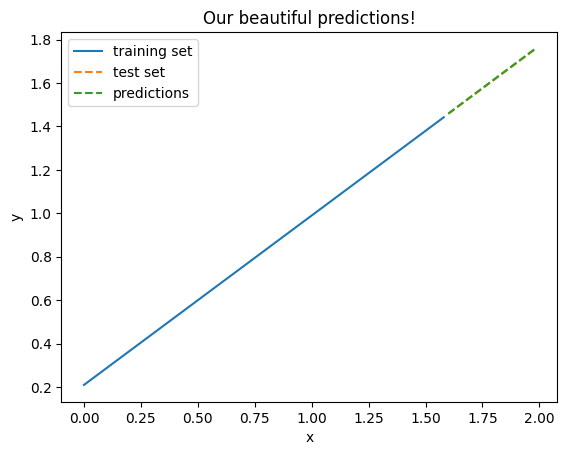

In [14]:
plt.title("Our beautiful predictions!")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_train, y_train, label="training set")
plt.plot(x_test, y_test, "--", label="test set")
plt.plot(x_test, y_preds, "--", label="predictions")
plt.legend();

In [19]:
model_state = modelka.state_dict()
print(f"Original: {0.78} Learned: {model_state["weight"]}")
print(f"Original: {0.21} Learned: {model_state["bias"]}")

Original: 0.78 Learned: tensor([0.7825])
Original: 0.21 Learned: tensor([0.2077])


In [ ]:
# Enough for today (or for now)